# Distribution of "empty" cells

An "empty" cell is defined as having one of the following characteristics:

1. No genes
2. No mitochondria
3. No RNA

These characteristics correspond to the following features that were engineered during preprocessing:

1. `zero_genes`
2. `zero_mito`
3. `zero_count`

## 0. Initializations

In [1]:
# -- imports --
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

from signals_in_the_noise.preprocessing.gse161529 import GSE161529
from signals_in_the_noise.utilities.storage import get_resources_path
from signals_in_the_noise.utilities.visualization import get_figure_axes

In [2]:
# -- datasets --
gse = GSE161529()

2025-08-01 13:26:42,236 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909253_N-PM0092-Total.h5ad as AnnData object.
2025-08-01 13:26:42,324 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909254_N-PM0019-Total.h5ad as AnnData object.
2025-08-01 13:26:42,471 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909255_N-N280-Epi.h5ad as AnnData object.
2025-08-01 13:26:42,521 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909256_N-PM0095-Epi.h5ad as AnnData object.
2025-08-01 13:26:42,662 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909257_N-PM0095-Total.h5ad 

In [3]:
all_real, all_noise = gse.get_combined_epithilial_dataset(
    hvg_post_stromal=True,
    real_pca_kwargs={'n_comps': 20},
    noise_pca_kwargs={'n_comps': 4},
)

2025-08-01 13:26:48,821 [INFO] signals_in_the_noise.preprocessing.gse161529: Loading combined datasets...


## 1. "Real" cells

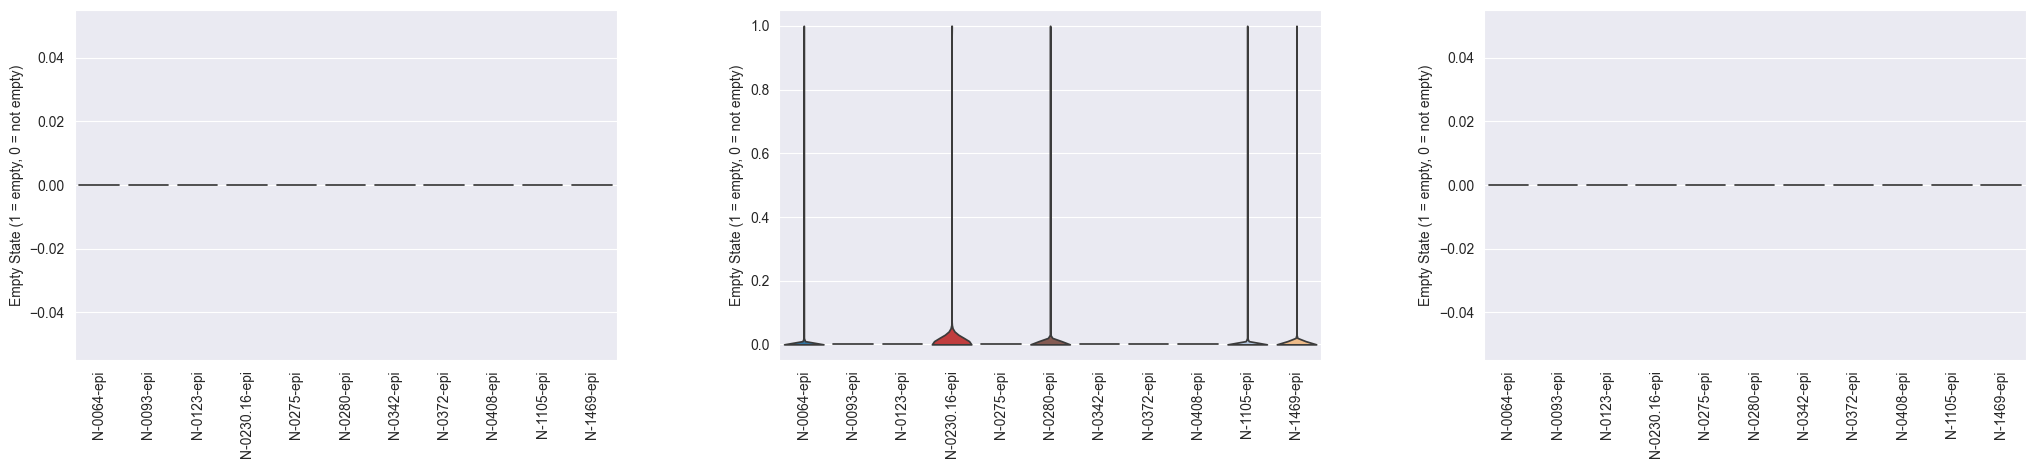

In [4]:
sc.pl.violin(
    all_real,
    keys=['zero_genes', 'zero_mito', 'zero_count'],
    groupby='specimen_id',
    stripplot=False,
    jitter=0,
    multi_panel=True,
    rotation=90,
    ylabel='Empty State (1 = empty, 0 = not empty)',
)

## 2. "Noise" cells

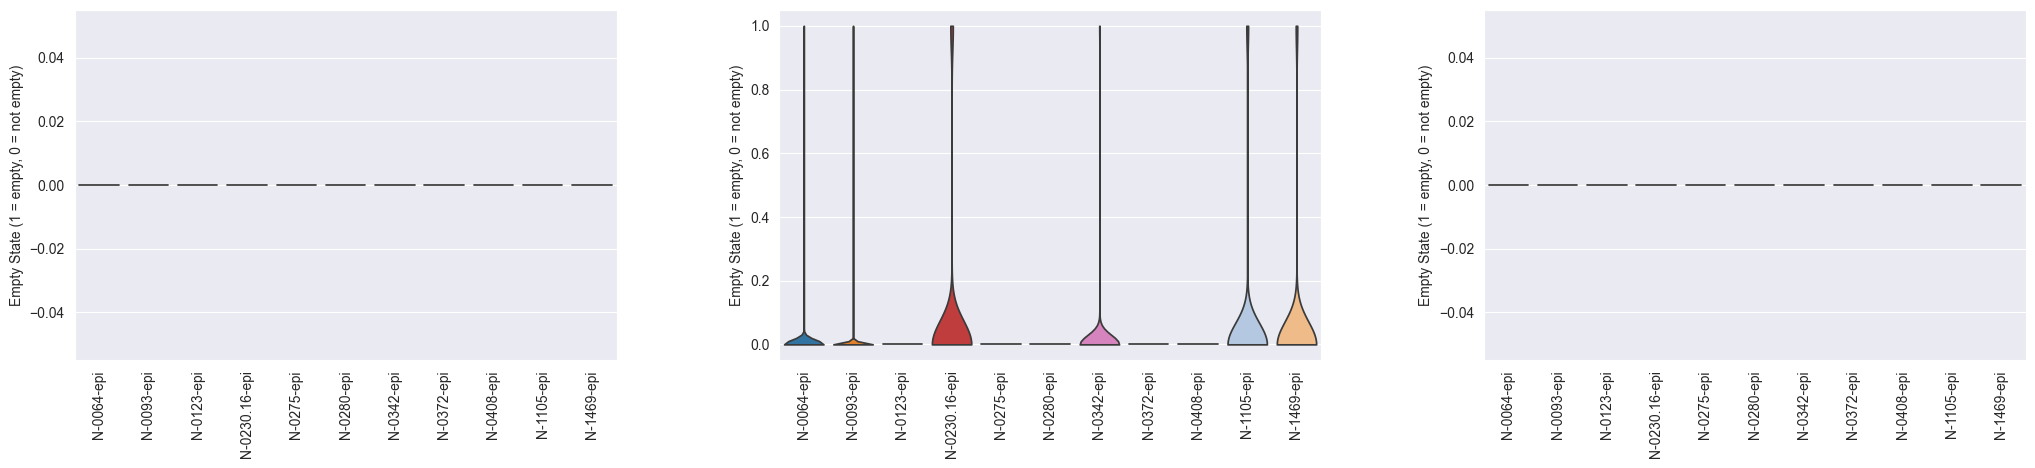

In [5]:
sc.pl.violin(
    all_noise,
    keys=['zero_genes', 'zero_mito', 'zero_count'],
    groupby='specimen_id',
    stripplot=False,
    jitter=0,
    multi_panel=True,
    rotation=90,
    ylabel='Empty State (1 = empty, 0 = not empty)',
)

## 3. Deeper dive into zero mitochondria

For this next step, recombine the two datasets and visualize violin plots grouping by other characteristics.

In [6]:
adata = ad.concat([all_real, all_noise], join='inner')

In [7]:
violin_kwargs = {
    'show': False,
    'keys': 'zero_mito',
    'rotation': 90,
    'ylabel': 'Empty State (1 = empty, 0 = not empty)',
}

def plot_violins(groupby):
    fig, axes = get_figure_axes(2, 2, subplot_size=(7, 8))
    fig.suptitle("Distribution of Zero Mitochondria")
    axes[0].set_title('"Noise" cells')
    axes[1].set_title('All cells')
    sc.pl.violin(
        all_noise,
        groupby=groupby,
        ax=axes[0],
        **violin_kwargs
    )
    sc.pl.violin(
        adata,
        groupby=groupby,
        ax=axes[1],
        **violin_kwargs
    )

    plt.tight_layout()
    plt.show()

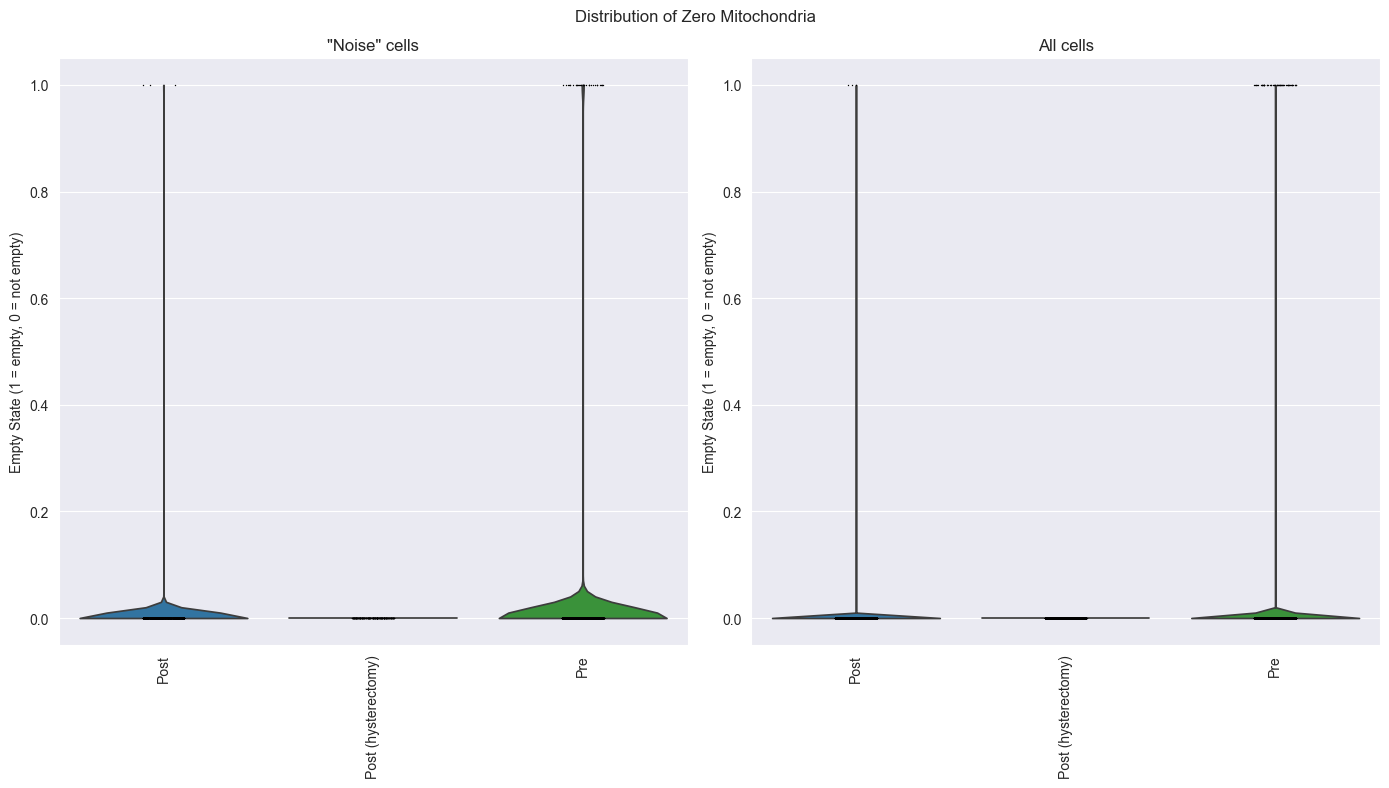

In [8]:
plot_violins('hormonal_status')

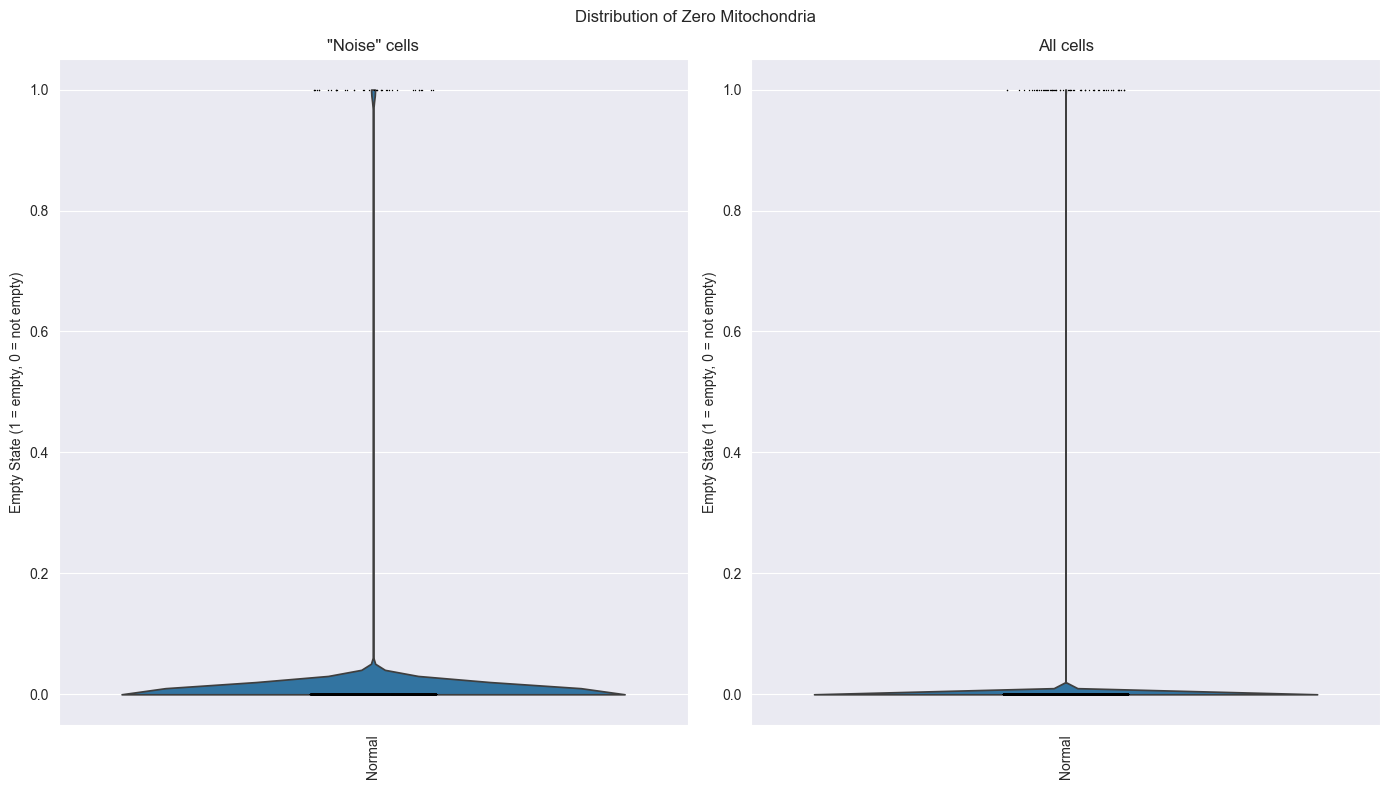

In [9]:
plot_violins('cancer_type')

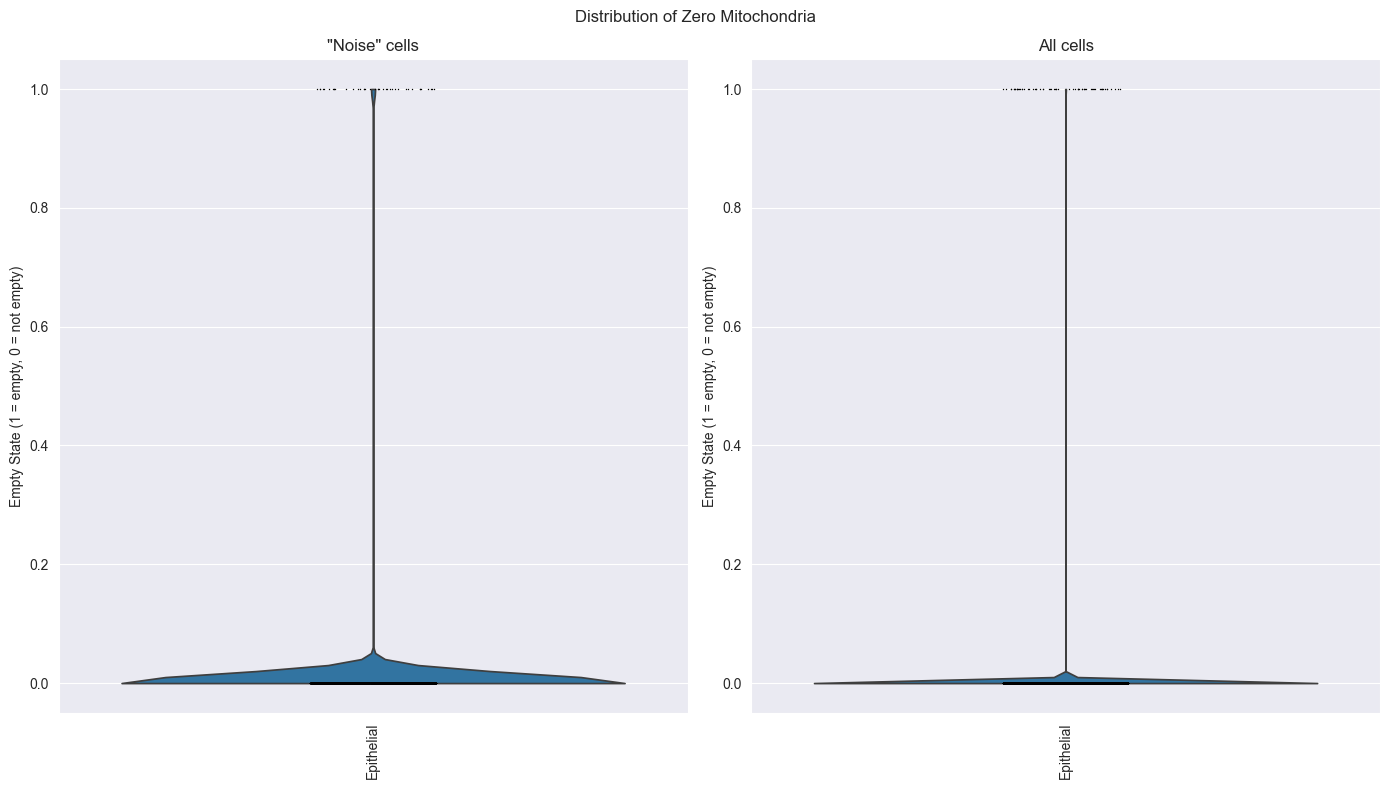

In [10]:
plot_violins('cell_population')

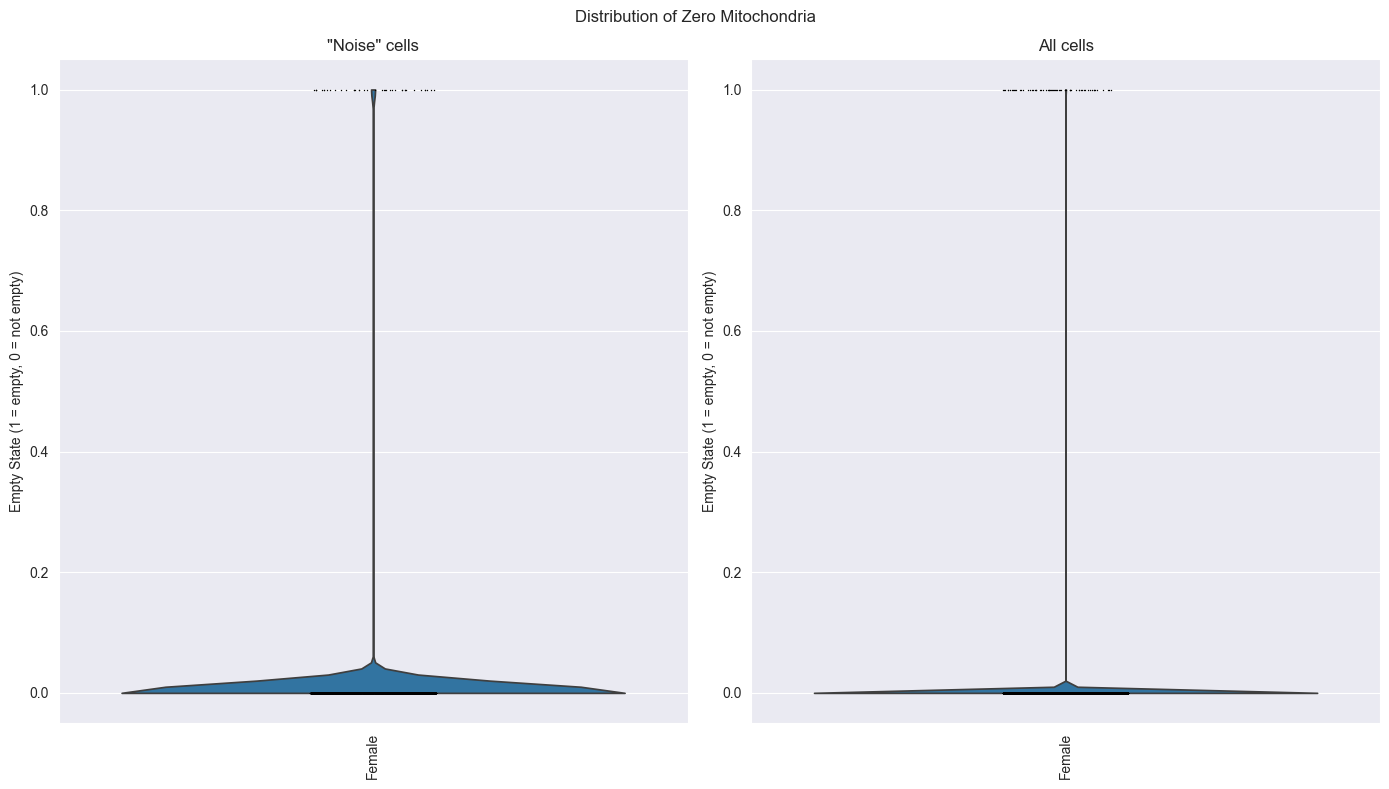

In [11]:
plot_violins('gender')

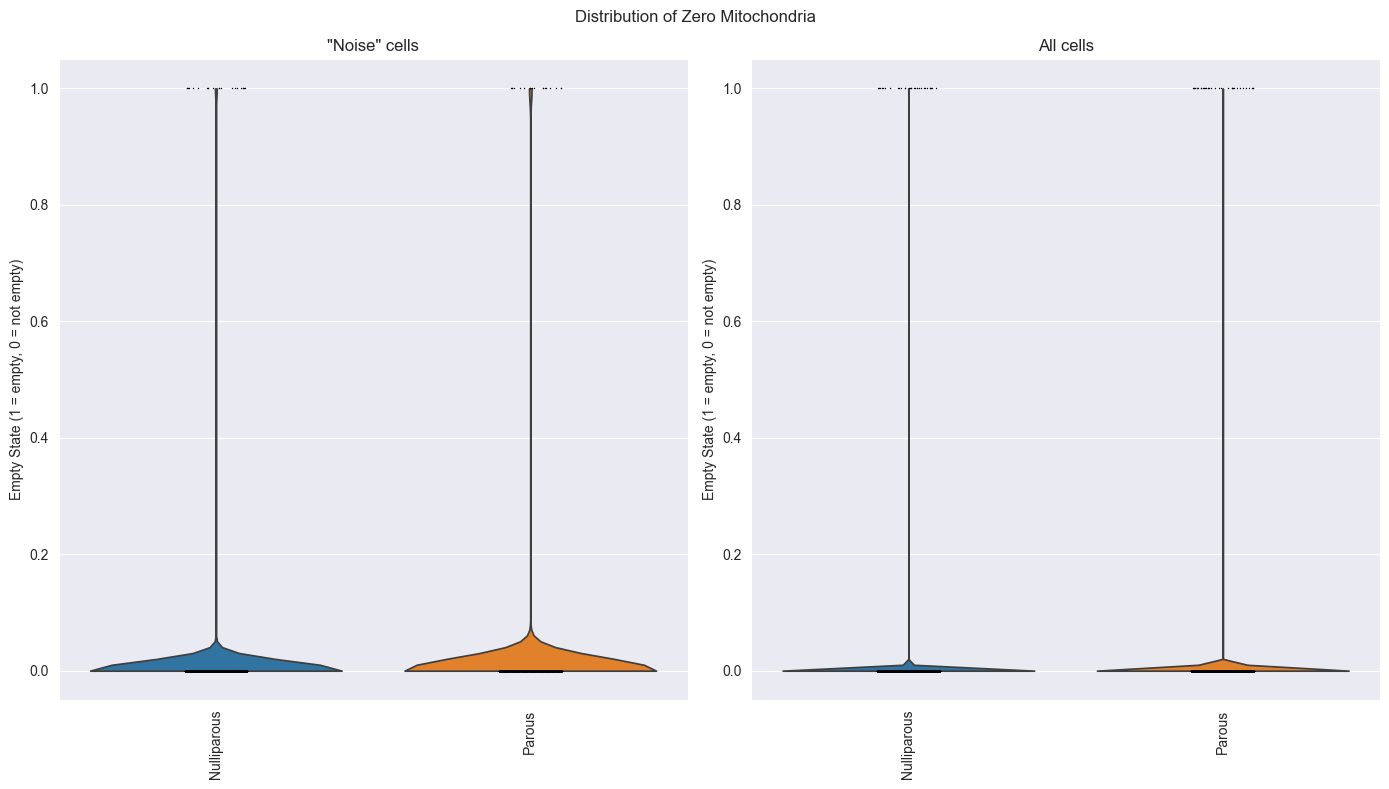

In [12]:
plot_violins('parity')

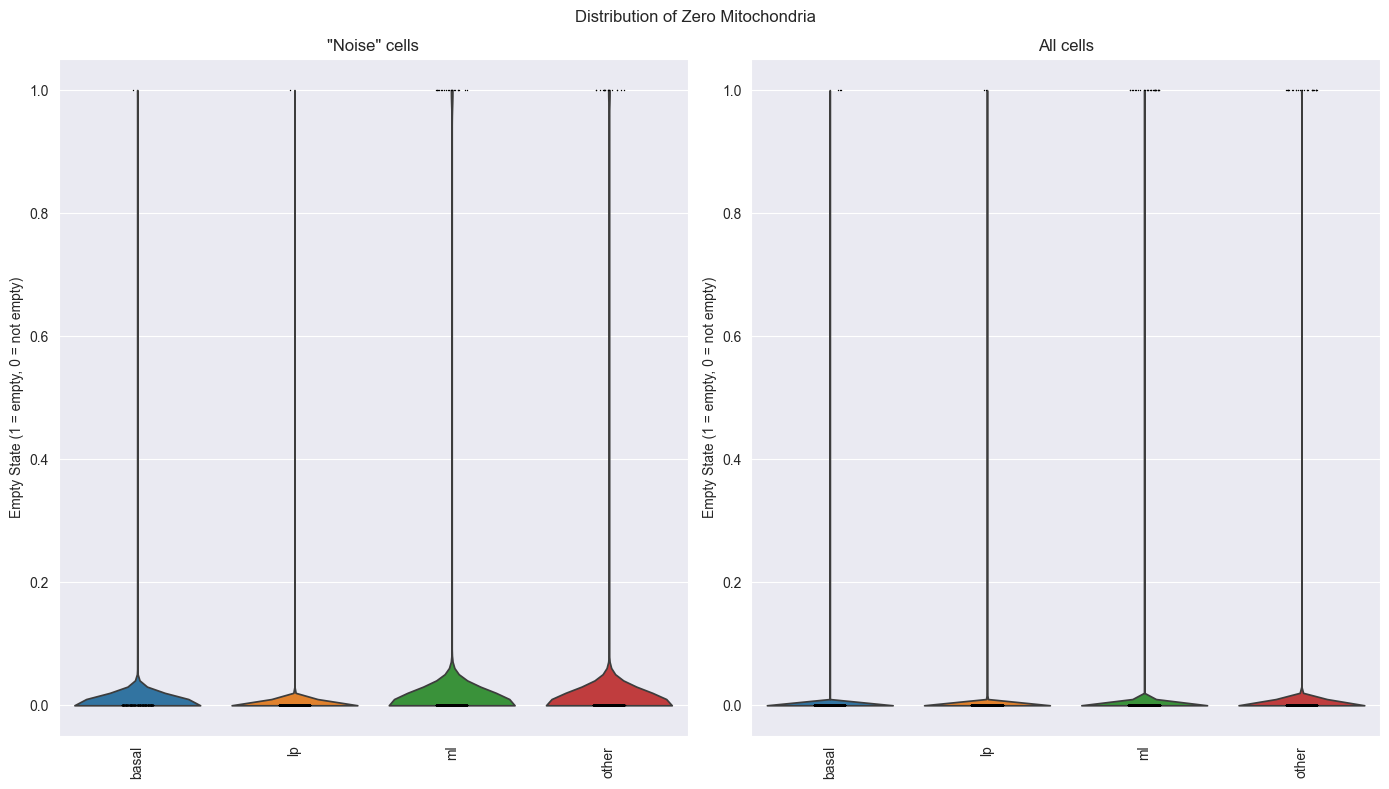

In [13]:
plot_violins('predicted_type')

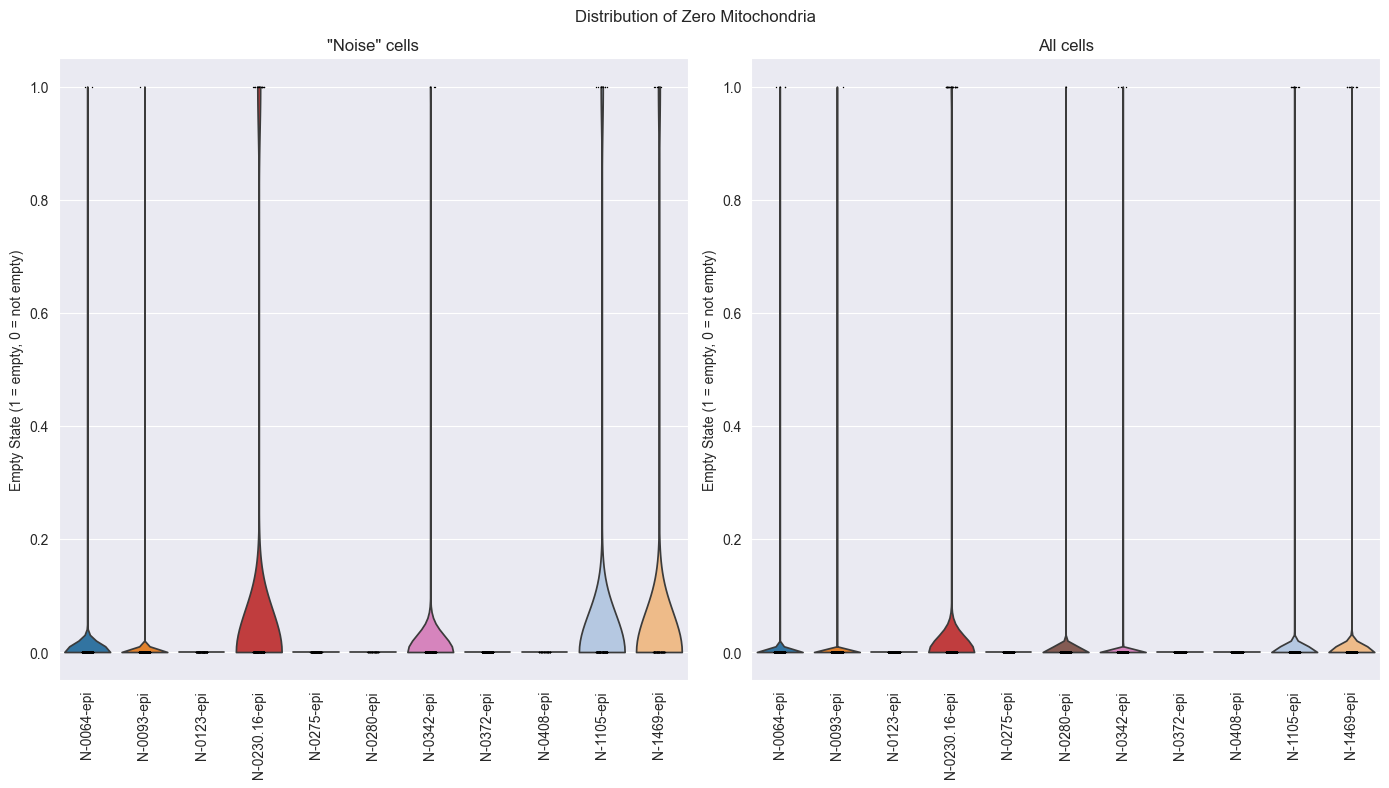

In [14]:
plot_violins('specimen_id')